<a href="https://colab.research.google.com/github/NimaZah/PoliticalDonationIndia/blob/main/Donations_to_national_political_parties_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/NimaZah/PoliticalDonationIndia/main/Donations%20to%20national%20political%20parties%20-%20India.csv')
df.head

<bound method NDFrame.head of         Party                    Name  ... Unnamed: 12 Unnamed: 13
0         CPI              Aziz Pasha  ...         NaN         NaN
1      CPI(M)        V K Ramachandran  ...         NaN         NaN
2         INC      Dr. Manmohan Singh  ...         NaN         NaN
3         INC     Dr. Manda Jagnathan  ...         NaN         NaN
4         INC        Prof. K.V.Thomas  ...         NaN         NaN
...       ...                     ...  ...         ...         ...
13568     BJP        Zydus Healthcare  ...         NaN         NaN
13569     BJP  Zydus Wellness Limited  ...         NaN         NaN
13570     BJP  Zydus Wellness Limited  ...         NaN         NaN
13571     BJP  Zydus Wellness Limited  ...         NaN         NaN
13572     NCP  Zydus Wellness -Sikkim  ...         NaN         NaN

[13573 rows x 14 columns]>

In [39]:
# Check the dataframe
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,"₹ 3,000,000.00",CASH,2010-11,NaN,NaN,NaN,NaN,NaN,NaN
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,"₹ 10,000,000.00","000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,"₹ 108,000.00","Cheque, State Bank of India Parliament House N...",2014-15,NaN,NaN,NaN,NaN,NaN,NaN
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,"₹ 3,000,000.00",CASH,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,"₹ 10,000,000.00","000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,"₹ 108,000.00","Cheque, State Bank of India Parliament House N...",2014-15
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,"₹ 54,000.00",Through Bank Transfer,2011-12


In [41]:
# Show the shape of the dataframe
df.shape

(13573, 8)

In [42]:
# Show the data type of each column
df.dtypes

Party                object
Name                 object
Type                 object
Address              object
PAN Given            object
Amount               object
Contribution Mode    object
FinancialYear        object
dtype: object

In [43]:
# Show the summary of the dataframe
df.describe()

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear
count,13573,13528,13573,13573,13573,13573,13339,13573
unique,5,10923,2,7280,4,682,10403,12
top,BJP,General Electoral Trust,Others,--,N,"₹ 100,000.00",Cash,2012-13
freq,8782,64,13442,3155,7897,2435,584,3776


In [44]:
# Then we need to remove the special character from the Amount column.
df['Amount'] = df['Amount'].str.replace('₹','')
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].astype(float)

In [45]:
# A little bit of data cleaning! We need to convert the data type of Amount to float.
df['Amount'] = df['Amount'].astype(float)

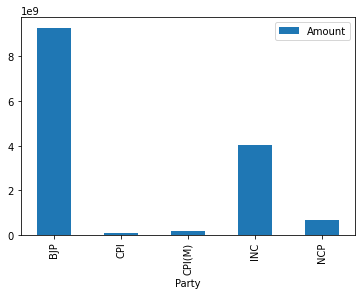

In [46]:
# Now ready to proceed with column Amount
## Create a chart for Amount by Party
df.groupby(['Party']).agg({'Amount':'sum'}).plot.bar()

In [47]:
# Calculate and show the total Amount contributed by each Party
df['Amount'].groupby(df['Party']).sum()

Party
BJP       9.295526e+09
CPI       6.812370e+07
CPI(M)    1.506221e+08
INC       4.031487e+09
NCP       6.479114e+08
Name: Amount, dtype: float64

In [48]:
# Calculate and show the percentage of Amount contributed by each Party
df['Amount'].groupby(df['Party']).sum() / df['Amount'].sum() * 100

Party
BJP       65.490642
CPI        0.479958
CPI(M)     1.061192
INC       28.403416
NCP        4.564791
Name: Amount, dtype: float64

In [49]:
# What is the Party that has received the highest amount of Amount?
df['Amount'].groupby(df['Party']).sum().idxmax()

'BJP'

In [50]:
df['Amount'].groupby(df['Party']).sum().idxmin()

'CPI'

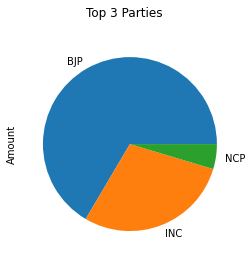

In [51]:
# Plot a Pie chart for the top 3 Parties, based on the Amount received and show the percentage
import matplotlib.pyplot as plt
df['Amount'].groupby(df['Party']).sum().nlargest(3).plot(kind='pie', subplots=True, title='Top 3 Parties')
plt.show()

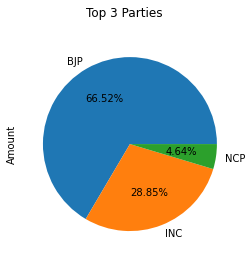

In [52]:
# Add percentage to the above pie chart to see the percentage each Party received
df['Amount'].groupby(df['Party']).sum().nlargest(3).plot(kind='pie', subplots=True, title='Top 3 Parties', autopct='%.2f%%')
plt.show()


In [53]:
# Create a new dataframe with the top 5 Parties, based on the Amount received
df.head(5)

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear
0,CPI,Aziz Pasha,Others,"16-B, Ferozeshah Road New Delhi-1",Y,3000000.0,CASH,2010-11
1,CPI(M),V K Ramachandran,Others,"No.1, First Floor Main Road Domlur Second Stag...",Y,10000000.0,"000037, HDFC Bank Bengaluru, Dt. 16.03.2015, 5...",2014-15
2,INC,Dr. Manmohan Singh,Others,"3, Motilal Nehru Place New Delhi",N,108000.0,"Cheque, State Bank of India Parliament House N...",2014-15
3,INC,Dr. Manda Jagnathan,Others,"9,Firozshah Road New Delhi",N,54000.0,Through Bank Transfer,2011-12
4,INC,Prof. K.V.Thomas,Others,"17,Dr.B.R.Mehta Lane New Delhi",N,54000.0,Through Bank Transfer,2011-12


In [54]:
# Create a new dataframe with the bottom 5 Parties, based on the Amount received
df.tail(5)

,Party,Name,Type,Address,PAN Given,Amount,Contribution Mode,FinancialYear
13568,BJP,Zydus Healthcare,Others,"Zydus Tower, Satellite Cross Road, Ahmedabad-3...",Y,1000000.0,"854, HDFC Bank",2014-15
13569,BJP,Zydus Wellness Limited,Others,"Zydaus Towere, Satellite Cross Roads, Ahmedaba...",Y,5000000.0,250506BANK OF BARODA,2010-11
13570,BJP,Zydus Wellness Limited,Others,"Zydus Tower, Satellite Cross Roads, Ahmedabad",Y,5000000.0,250507BANK OF BARODA,2010-11
13571,BJP,Zydus Wellness Limited,Others,"Zydus Wellneww Ltd, Zydus Tower Satellite Cros...",Y,10000000.0,"901983, Bank of Baroda",2012-13
13572,NCP,Zydus Wellness -Sikkim,Others,"Plot No- 26, 27, 28, 30 & 37 Mamring Block, Di...",Y,10000000.0,"Ch No- 170996, Date 31-03-2014, Bank Of Baroda...",2013-14


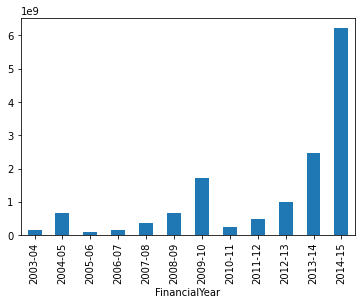

In [58]:

# Let's create a graph to show the total Amount received by each Financial Year
df['Amount'].groupby(df['FinancialYear']).sum().plot.bar()

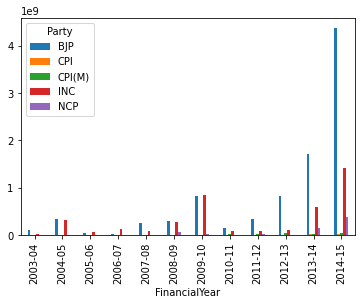

In [59]:
# Let's create a graph to show the total Amount received by each top 5 Parties over time
df['Amount'].groupby([df['FinancialYear'], df['Party']]).sum().unstack().plot.bar()

In [ ]:
# What is the total Amount received by each Party over time?
df['Amount'].groupby([df['FinancialYear'], df['Party']]).sum().unstack()

Party,BJP,CPI,CPI(M),INC,NCP
FinancialYear,,,,,
2003-04,1.168820e+08,779148.0,200000.0,2.830110e+07,NaN
2004-05,3.395213e+08,630000.0,896355.0,3.205556e+08,NaN
2005-06,3.615611e+07,3988690.0,550000.0,5.921249e+07,NaN
2006-07,2.955067e+07,1229400.0,1124719.0,1.212735e+08,NaN
2007-08,2.496237e+08,4125800.0,7226116.0,7.887345e+07,10225000.0
2008-09,3.060572e+08,2585000.0,4155000.0,2.790185e+08,56091000.0
2009-10,8.232201e+08,8667852.0,3962049.0,8.405212e+08,30300000.0
2010-11,1.462533e+08,10811465.0,15357072.0,8.020588e+07,1355000.0
2011-12,3.341941e+08,5982675.0,23838657.0,9.591066e+07,21000000.0


In [61]:
# Let's ask some correlational questions
# What is the total Amount received by each Party over time?
df['Amount'].groupby([df['FinancialYear'], df['Party']]).sum().unstack()

Party,BJP,CPI,CPI(M),INC,NCP
FinancialYear,,,,,
2003-04,1.168820e+08,779148.0,200000.0,2.830110e+07,NaN
2004-05,3.395213e+08,630000.0,896355.0,3.205556e+08,NaN
2005-06,3.615611e+07,3988690.0,550000.0,5.921249e+07,NaN
2006-07,2.955067e+07,1229400.0,1124719.0,1.212735e+08,NaN
2007-08,2.496237e+08,4125800.0,7226116.0,7.887345e+07,10225000.0
2008-09,3.060572e+08,2585000.0,4155000.0,2.790185e+08,56091000.0
2009-10,8.232201e+08,8667852.0,3962049.0,8.405212e+08,30300000.0
2010-11,1.462533e+08,10811465.0,15357072.0,8.020588e+07,1355000.0
2011-12,3.341941e+08,5982675.0,23838657.0,9.591066e+07,21000000.0
